
 Veri Seti Tanıtımı 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64

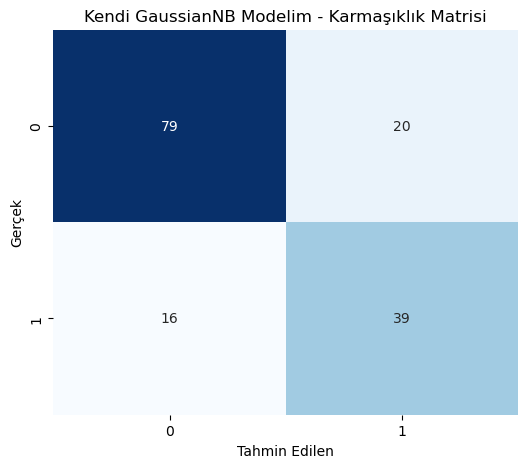

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

print("\n Veri Seti Tanıtımı ")
veri = pd.read_csv("C:\\Users\\ASUS\\Downloads\\veri\\diabetes.csv")

print(veri.head())
print("\nVeri Bilgisi:")
print(veri.info())
print("\nEksik Veriler:")
print(veri.isnull().sum())

veri.fillna(veri.mean(), inplace=True)

X = veri.iloc[:, :-1]  # Son sütun hariç tüm sütunları bağımsız değişken olarak al
y = veri.iloc[:, -1]   # Son sütunu bağımlı değişken (hedef) olarak al

X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class MyGaussianNB:
    def fit(self, X, y):
        self.siniflar = np.unique(y)
        self.ortalama = {}
        self.varyans = {}
        self.oncelik = {}

        for sinif in self.siniflar:
            X_sinif = X[y == sinif]
            self.ortalama[sinif] = X_sinif.mean(axis=0)
            self.varyans[sinif] = X_sinif.var(axis=0)
            self.oncelik[sinif] = X_sinif.shape[0] / X.shape[0]

    def predict(self, X):
        tahminler = [self._tek_tahmin(x) for x in X]
        return np.array(tahminler)

    def _tek_tahmin(self, x):
        olasiliklar = []
        for sinif in self.siniflar:
            oncelik_log = np.log(self.oncelik[sinif])
            olasilik_log = -0.5 * np.sum(np.log(2 * np.pi * self.varyans[sinif]))
            olasilik_log -= 0.5 * np.sum((x - self.ortalama[sinif]) ** 2 / self.varyans[sinif])
            olasiliklar.append(oncelik_log + olasilik_log)
        return self.siniflar[np.argmax(olasiliklar)]

print("\n GaussianNB Modelim Eğitiliyor... ")
model_benim = MyGaussianNB()

baslangic_zamani = time.time()
model_benim.fit(X_egitim.to_numpy(), y_egitim.to_numpy())
egitim_suresi_benim = (time.time() - baslangic_zamani)*1000000000

baslangic_zamani = time.time()
y_tahmin_benim = model_benim.predict(X_test.to_numpy())
test_suresi_benim = (time.time() - baslangic_zamani)*1000000000

dogruluk_benim = accuracy_score(y_test, y_tahmin_benim)
cm_benim = confusion_matrix(y_test, y_tahmin_benim)

print("\nKendi Modelimin Doğruluk Oranı:", dogruluk_benim)
print("Karmaşıklık Matrisi:\n", cm_benim)
print("\nEğitim süresi: {:.4f} saniye".format(egitim_suresi_benim))
print("Test süresi: {:.4f} saniye".format(test_suresi_benim))

def ciz_karmasiklik_matrisi(cm, baslik):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(baslik)
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.show()

ciz_karmasiklik_matrisi(cm_benim, "Kendi GaussianNB Modelim - Karmaşıklık Matrisi")
